In [15]:
%matplotlib inline
import nltk
import string
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.porter import PorterStemmer
from matplotlib import pyplot as plt
import numpy as np

root_dir = 'Dostoyevsky'
token_dict = {}
stemmer = PorterStemmer()
f_list = []

def stem_tokens(tokens, stemmer):
    stemmed = []
    regex = re.compile('[^a-zA-Z]')
    for item in tokens:
        item = regex.sub('', item)
        stemmed.append(stemmer.stem(item))        
        #stemmed.append(item)
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

for file in os.listdir(root_dir):
        file_path = root_dir + '/' + file
        f = open(file_path, 'r')
        text = f.read()
        lowers = text.lower()
        no_punctuation = lowers.translate(string.punctuation)
        print(file)
        token_dict[file] = no_punctuation
        f_list.append(file)
T = len(f_list)

TheBrothersKaramazov.txt
CrimeAndPunishment.txt
Idiot.txt
NotesFromTheUnderground.txt
TheGrandInquisitor.txt
TheDevils.txt
PoorFolk.txt
TheGambler.txt


In [16]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())
feature_names = tfidf.get_feature_names()
print('Matrix Created.')

Matrix Created.


In [17]:
matrix = tfs.toarray()
U, s, V = np.linalg.svd(matrix, full_matrices=False)
print('SVD is done.')

SVD is done.


[ 1.          0.04632318  0.02919468  0.02764384  0.02267207  0.0208209
  0.01881484  0.01775561]


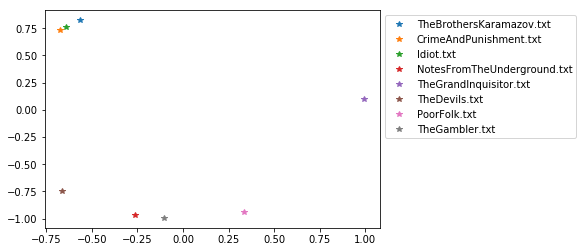

In [19]:
print(s/max(s))
U = U * s
a = U[:,1:3]
for i in range(T):
    d = np.sqrt(a[i,0]*a[i,0] + a[i,1]*a[i,1])
    plt.plot(a[i,0]/d,a[i,1]/d,'*',label=f_list[i])
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.show()